In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


## Read Data

In [3]:
df=pd.read_csv('Churn_Modelling.csv')


In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Balance'].value_counts().reset_index()

,Balance,count
0,0.00,3617
1,130170.82,2
2,105473.74,2
3,85304.27,1
4,159397.75,1
...,...,...
6377,81556.89,1
6378,112687.69,1
6379,108698.96,1
6380,238387.56,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
len(df)

10000

In [15]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [16]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Male,5457
1,Female,4543


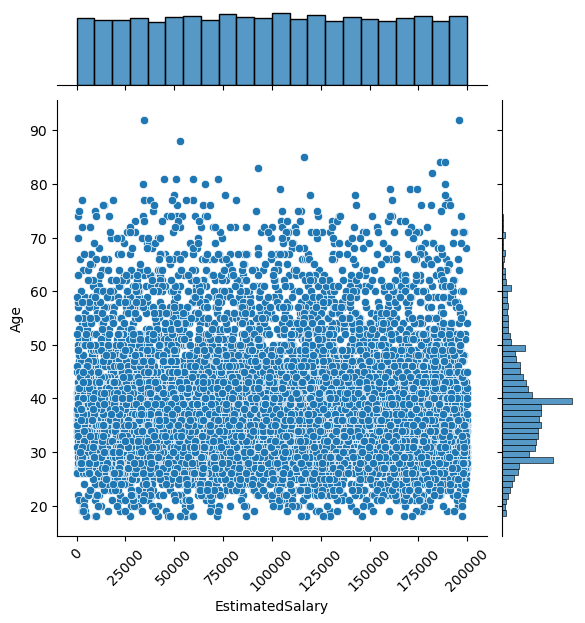

In [17]:
sns.jointplot(data=df,x='EstimatedSalary',y='Age')
plt.xticks(rotation=45)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['Geography']=encoder.fit_transform(df['Geography'])

In [19]:
x=df.drop('Exited',axis=1)
y=df['Exited']

## imbalanced 


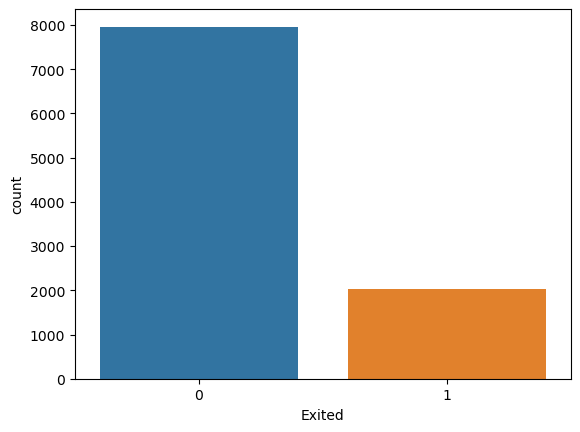

In [20]:
sns.countplot(x=df['Exited'])
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='all',k_neighbors=3)
X,Y=smote.fit_resample(x,y)

## split data

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=43)

In [23]:
columns=x_train.columns
columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

## scalling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

## Feature Engineering
 # apply pca then use lasso and f_classify to select best feature , try pca , lasso , f_ to choose best result

# 

# pca

In [26]:
from sklearn.decomposition import PCA
pca = PCA()

x_train=pca.fit_transform(x_train)
x_val=pca.transform(x_val)
x_test=pca.transform(x_test)


ex_var_ratio=pca.explained_variance_ratio_
cumlative_var_ratio=np.cumsum(ex_var_ratio)

n_component=np.argmax(cumlative_var_ratio>=0.5)+1
print(f'best number of K ={n_component}')


best number of K =3


In [27]:
pca = PCA(n_components=3)

x_train_pca=pca.fit_transform(x_train)
x_val_pca=pca.transform(x_val)
x_test_pca=pca.transform(x_test)

In [28]:
x_train_pca.shape

(12183, 3)

# lasso

In [29]:
from sklearn.linear_model import LassoCV

lasso=LassoCV(cv=3)
lasso.fit(x_train,y_train)


LassoCV(cv=3)

In [30]:
lasso.coef_


array([-0.45566873, -0.06424757, -0.06830431, -0.02000273, -0.03492404,
       -0.13653317, -0.24771765, -0.20995538, -0.2165922 ,  1.02787356])

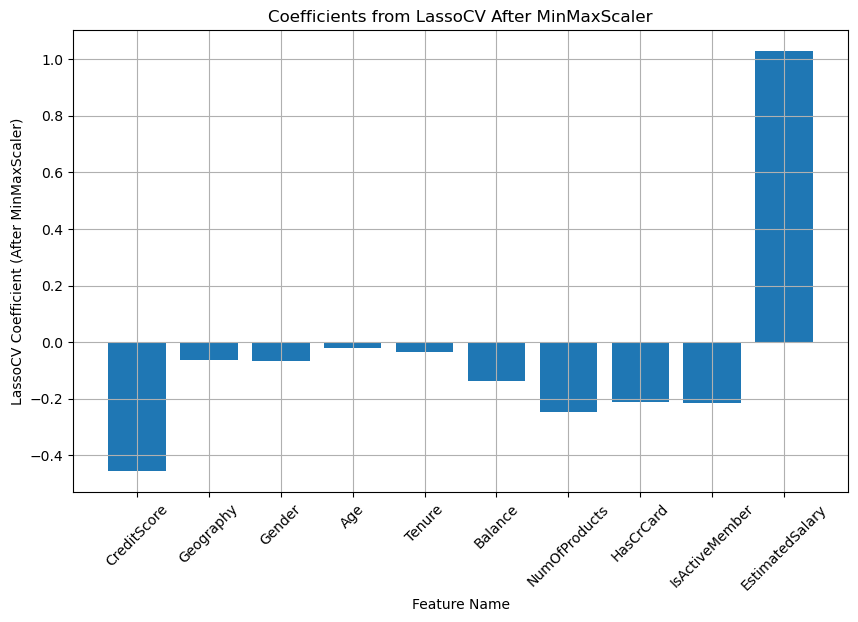

Important Features (based on absolute coefficient magnitude): ['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [31]:
import matplotlib.pyplot as plt

coefs = lasso.coef_

feature_names = columns

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefs)
plt.xlabel("Feature Name")
plt.ylabel("LassoCV Coefficient (After MinMaxScaler)")
plt.title("Coefficients from LassoCV After MinMaxScaler")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

threshold = 0.1
important_features = [feature_names[i] for i, coef in enumerate(coefs) if abs(coef) >= threshold]

print("Important Features (based on absolute coefficient magnitude):", important_features)

## f_classif

In [32]:
from sklearn.feature_selection import SelectKBest,f_classif

fsm=SelectKBest(f_classif,k=4)
fsm.fit_transform(x_train,y_train)

X_selected_TRAIN=fsm.transform(x_train)
X_selected_VALID=fsm.transform(x_val)
X_selected_TEST=fsm.transform(x_test)

In [33]:
mask=fsm.get_support()

x_train=pd.DataFrame(x_train,columns=columns)
selected_feature=pd.DataFrame(x_train).columns[mask]
selected_feature


Index(['CreditScore', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'], dtype='object')

#

In [34]:
x_train=pd.DataFrame(x_train,columns=columns)
x_val=pd.DataFrame(x_val,columns=columns)
x_test=pd.DataFrame(x_test,columns=columns)

In [63]:
x_train_lasso=x_train[['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
x_val_lasso=x_val[['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
x_test_lasso=x_test[['CreditScore', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

In [64]:
x_train_fs=x_train[['CreditScore', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]
x_val_fs=x_val[['CreditScore', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]
x_test_fs=x_test[['CreditScore', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]

# Model Try logistic regression , Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,auc,roc_auc_score,roc_curve,confusion_matrix

# Tuning with Logistic Regression

In [76]:
params_grid1={  
    'penalty':['l1','l2'],
    'C':[0.01,0.1,1,10],
    'solver' : ['liblinear','saga'],
    'max_iter' : [100,200,300,400,500,600]
}

In [77]:
tuning_Log_Reg=GridSearchCV(estimator=LogisticRegression(),param_grid=params_grid1,cv=3,n_jobs=-1,verbose=2)
tuning_Log_Reg.fit(x_train_lasso,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300, 400, 500, 600],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [89]:
print(f"Best Score : {tuning_Log_Reg.best_score_}")
print(f"Best Paramaters : {tuning_Log_Reg.best_params_}")

Best Score : 0.7678732660264304
Best Paramaters : {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [91]:
Log_Reg= LogisticRegression(C=10, max_iter=100, penalty='l2', solver='saga')

Log_Reg.fit(x_train_lasso,y_train)

LogisticRegression(C=10, solver='saga')

In [92]:
y_train_pred1=Log_Reg.predict(x_train_lasso)
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      6055
           1       0.77      0.78      0.77      6128

    accuracy                           0.77     12183
   macro avg       0.77      0.77      0.77     12183
weighted avg       0.77      0.77      0.77     12183



In [93]:
y_val_pred1=Log_Reg.predict(x_val_lasso)
print(classification_report(y_val,y_val_pred1))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       675
           1       0.77      0.78      0.77       679

    accuracy                           0.77      1354
   macro avg       0.77      0.77      0.77      1354
weighted avg       0.77      0.77      0.77      1354



In [94]:
y_test_pred1=Log_Reg.predict(x_test_lasso)
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1233
           1       0.74      0.79      0.76      1156

    accuracy                           0.76      2389
   macro avg       0.76      0.76      0.76      2389
weighted avg       0.76      0.76      0.76      2389



In [95]:
print(confusion_matrix(y_test,y_test_pred1))

[[909 324]
 [245 911]]


#####

# Tuning with Random Forest

In [114]:
param_grid2 = {
  'n_estimators': [int(x) for x in np.linspace(100, 1000, 10)],
  'max_depth': [int(x) for x in np.linspace(1, 11, 6)],
  'min_samples_split': [int(x) for x in np.linspace(2,7,6)], 
  'min_samples_leaf': [1, 2, 3]
}


In [115]:
np.linspace(2,7,6)

array([2., 3., 4., 5., 6., 7.])

In [138]:
tuning_Random_Forest_=RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid2, 
                                         cv=8, n_iter=50, verbose=1,n_jobs=-1)
tuning_Random_Forest_.fit(x_train_lasso,y_train)

Fitting 8 folds for each of 50 candidates, totalling 400 fits


RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=1)

In [139]:
print(f"Best Score : {tuning_Random_Forest_.best_score_}")
print(f"Best Paramaters : {tuning_Random_Forest_.best_params_}")

Best Score : 0.828778107131733
Best Paramaters : {'n_estimators': 800, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 11}


In [277]:
Random_Forest=RandomForestClassifier(n_estimators=400, ccp_alpha=0.00009, min_samples_leaf=2 ,max_depth=8)
Random_Forest.fit(x_train_lasso,y_train)

RandomForestClassifier(ccp_alpha=9e-05, max_depth=8, min_samples_leaf=2,
                       n_estimators=400)

In [278]:
y_train_pred2=Random_Forest.predict(x_train_lasso)
print(classification_report(y_train,y_train_pred2))

y_val_pred2=Random_Forest.predict(x_val_lasso)
print(classification_report(y_val,y_val_pred2))




              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6055
           1       0.84      0.84      0.84      6128

    accuracy                           0.84     12183
   macro avg       0.84      0.84      0.84     12183
weighted avg       0.84      0.84      0.84     12183

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       675
           1       0.81      0.82      0.81       679

    accuracy                           0.81      1354
   macro avg       0.81      0.81      0.81      1354
weighted avg       0.81      0.81      0.81      1354



In [279]:
y_test_pred2=Random_Forest.predict(x_test_lasso)
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1233
           1       0.80      0.83      0.82      1156

    accuracy                           0.82      2389
   macro avg       0.82      0.82      0.82      2389
weighted avg       0.82      0.82      0.82      2389



In [280]:
print(confusion_matrix(y_test,y_test_pred2))

[[995 238]
 [195 961]]


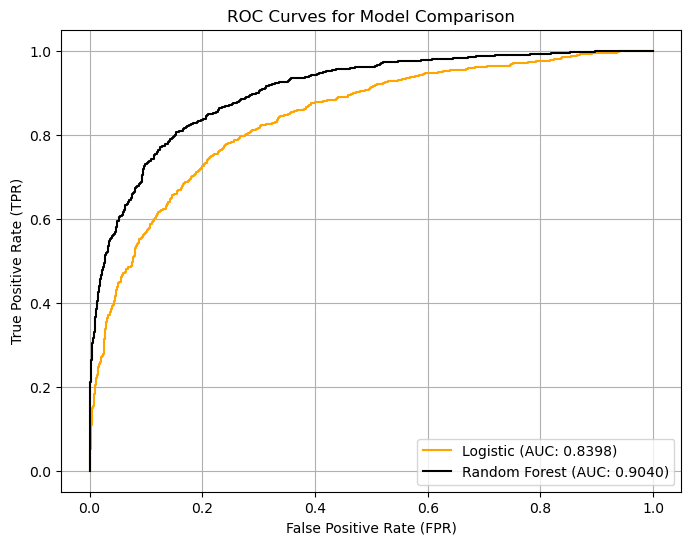

In [281]:
y_pred_log = Log_Reg.predict_proba(x_test_lasso)[:, 1]
y_pred_rfc = Random_Forest.predict_proba(x_test_lasso)[:, 1]  # Probability of positive class for Logistic Regression

# Calculate ROC curves and AUC scores
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log)
auc_log = auc(fpr_log, tpr_log)

fpr_rfc_, tpr_rfc_, _ = roc_curve(y_test, y_pred_rfc)
auc_rfc_ = auc(fpr_rfc_, tpr_rfc_)


# Plot the ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label='Logistic (AUC: {:.4f})'.format(auc_log),color='orange')
plt.plot(fpr_rfc_, tpr_rfc_, label='Random Forest (AUC: {:.4f})'.format(auc_rfc_),color='black')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [283]:
import pickle 

with open('Customer_Churn_Prediction_MRFCf.pkl', 'wb') as f:
    pickle.dump(Random_Forest, f)



In [79]:
import pickle

with open('Customer_Churn_Prediction_MRFCW.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
